<a href="https://colab.research.google.com/github/berilldindar/SmsSpamDetection/blob/main/SMS_SPAM_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/drive')
%cd /drive

Mounted at /drive
/drive


In [ ]:
import os
os.chdir('/drive/My Drive/Sms Spam Detection')

In [ ]:
root='/drive/My Drive/Sms Spam Detection/'
df=pd.read_csv(root+'data/spam.csv',encoding='latin1')
df.shape

(5572, 5)

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
print("Null Values entry in Unnamed:2 column={}\nNull Values entry in Unnamed:3 column={}\nNull Values entry in Unnamed:4 column={}".format(df['Unnamed: 2'].isnull().sum(),df['Unnamed: 3'].isnull().sum(),df['Unnamed: 2'].isnull().sum()))

Null Values entry in Unnamed:2 column=5522
Null Values entry in Unnamed:3 column=5560
Null Values entry in Unnamed:4 column=5522


In [ ]:
print("shape of dataset: {}".format(df.shape))

shape of dataset: (5572, 5)


In [ ]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [ ]:
df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
df.rename(columns={'v1':'Label','v2':'Msg'},inplace=True)

total no. of ham messages: 4825
total no. of spam messages: 747


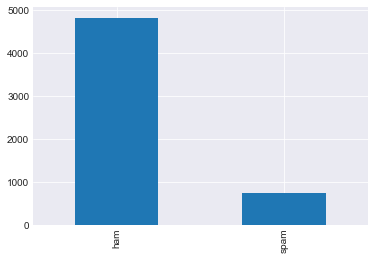

In [ ]:
print("total no. of ham messages: {}\ntotal no. of spam messages: {}".format(df['Label'].value_counts()[0],df['Label'].value_counts()[1]))
df['Label'].value_counts().plot.bar()

In [ ]:
df.describe()

,Label,Msg
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df['len']=df['Msg'].apply(len)
df.head()

,Label,Msg,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
print("Message={}\n\nLabel={}".format(df['Msg'][df['len'].idxmax()],df['Label'][df['len'].idxmax()]))

Message=For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..

Label=ham


In [ ]:
print("Message={}\n\nLabel={}".format(df['Msg'][df['len'].idxmin()],df['Label'][df['len'].idxmin()]))

Message=Ok

Label=ham


Text(0.5, 1.0, 'Length Histogram')

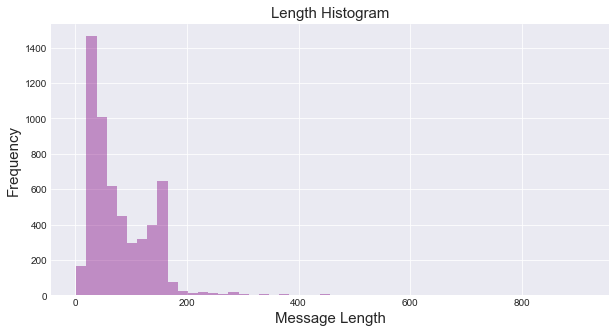

In [ ]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,5))
sns.distplot(df['len'],kde=False,color='purple',hist=True)
plt.xlabel("Message Length",size=15)
plt.ylabel("Frequency",size=15)
plt.title("Length Histogram",size=15)

Text(0.5, 0, 'Message Length')

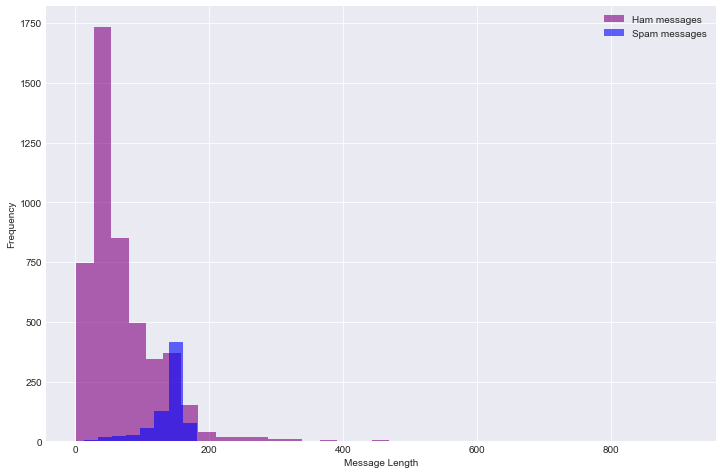

In [ ]:
plt.figure(figsize=(12, 8))

df[df['Label']=='ham'].len.plot(bins=35, kind='hist', color='purple', 
                                       label='Ham messages', alpha=0.6)
df[df['Label']=='spam'].len.plot(kind='hist', color='blue', 
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

In [ ]:
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aybilge\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [ ]:
ps = PorterStemmer() 
message = []
for i in range(0, df.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', df['Msg'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    message.append(review)

In [ ]:
df['clean_msg']=np.empty((len(message),1))
for i in range(len(message)):
    df['clean_msg'][i]=message[i]
df['clean_msg_len']=df['clean_msg'].apply(len)
df.head()

,Label,Msg,len,clean_msg,clean_msg_len
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...,76
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni,21
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri wkli comp win fa cup final tkt st m...,99
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say,35
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though,36


In [ ]:
df['Msg'].describe()

count                       5572
unique                      5169
top       Sorry, I'll call later
freq                          30
Name: Msg, dtype: object

In [ ]:
df['clean_msg'].describe()

count                 5572
unique                5056
top       sorri call later
freq                    30
Name: clean_msg, dtype: object

In [ ]:
df=pd.concat([df, pd.get_dummies(df['Label'])], axis=1)
df.drop(['Label'],axis=1,inplace=True)
df.drop(['spam'],axis=1,inplace=True)
df.rename(columns={'ham':'label'},inplace=True)
df.head()

,Msg,len,clean_msg,clean_msg_len,label
0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...,76,1
1,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni,21,1
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri wkli comp win fa cup final tkt st m...,99,0
3,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say,35,1
4,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though,36,1


In [ ]:
X=df['clean_msg']
X

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri wkli comp win fa cup final tkt st m...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    nd time tri contact u u pound prize claim easi...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: clean_msg, Length: 5572, dtype: object

In [ ]:
Y=df['label']

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(message).toarray()
X

In [ ]:
# print(X)
Y=np.array(Y)
type(Y)
# t(Y)

numpy.ndarray

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.10, random_state = 0)

In [ ]:
print("X_train shape: {}\n X_test shape: {}\nY_train shape: {}\nY_test shape: {}".format(X_train.shape,X_test.shape,y_train.shape,y_test.shape))

X_train shape: (5014, 2500)
 X_test shape: (558, 2500)
Y_train shape: (5014,)
Y_test shape: (558,)


In [ ]:
acc=[]

In [ ]:
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)
pred=spam_detect_model.predict(X_test)

print("Accuracy of Naive Bayes Classifier is: {}".format(metrics.accuracy_score(y_test,pred)))
acc.append(metrics.accuracy_score(y_test,pred))

Accuracy of Naive Bayes Classifier is: 0.9802867383512545


In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(solver='liblinear')
LR.fit(X_train,y_train)
yhat = LR.predict(X_test)
print("LogisticRegression's Accuracy:{0}".format(metrics.accuracy_score(y_test, yhat)))
acc.append(metrics.accuracy_score(y_test,yhat))

LogisticRegression's Accuracy:0.9802867383512545


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
yhat = clf.predict(X_test)
print("SVM's Accuracy:{0}".format(metrics.accuracy_score(y_test, yhat)))
acc.append(metrics.accuracy_score(y_test, yhat))

SVM's Accuracy:0.8333333333333334


In [ ]:
from sklearn.ensemble import RandomForestClassifier
Random_forest = RandomForestClassifier(n_estimators=50)
Random_forest.fit(X_train,y_train)
randomForest_predict = Random_forest.predict(X_test)
randomForest_score = metrics.accuracy_score(y_test, randomForest_predict)
print("Random Forest Score :",randomForest_score)
acc.append(metrics.accuracy_score(y_test,randomForest_predict ))

Random Forest Score : 0.982078853046595


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier(random_state=100, n_estimators=150,min_samples_split=100, max_depth=6)
gbk.fit(X_train, y_train)
gbk_predict = gbk.predict(X_test)
print("Gradient Boosting Score :",metrics.accuracy_score(y_test,gbk_predict ))
acc.append(metrics.accuracy_score(y_test,gbk_predict ))

Gradient Boosting Score : 0.9767025089605734


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
mx=-1
for i in range(1,25):
    
    neigh=KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    KNN_score=metrics.accuracy_score(y_test, yhat)
    print("KNN Accuracy at {} is {}".format(i,KNN_score))
    mx=max(mx,KNN_score)
    print("\n")
acc.append(mx)
mx

KNN Accuracy at 1 is 0.953405017921147


KNN Accuracy at 2 is 0.9587813620071685


KNN Accuracy at 3 is 0.9265232974910395


KNN Accuracy at 4 is 0.9283154121863799


KNN Accuracy at 5 is 0.9121863799283154


KNN Accuracy at 6 is 0.9175627240143369


KNN Accuracy at 7 is 0.8924731182795699


KNN Accuracy at 8 is 0.8942652329749103


KNN Accuracy at 9 is 0.8870967741935484


KNN Accuracy at 10 is 0.8870967741935484


KNN Accuracy at 11 is 0.8817204301075269


KNN Accuracy at 12 is 0.8817204301075269


KNN Accuracy at 13 is 0.8727598566308243


KNN Accuracy at 14 is 0.8745519713261649


KNN Accuracy at 15 is 0.8727598566308243


KNN Accuracy at 16 is 0.8745519713261649


KNN Accuracy at 17 is 0.8673835125448028


KNN Accuracy at 18 is 0.8673835125448028


KNN Accuracy at 19 is 0.8620071684587813


KNN Accuracy at 20 is 0.8620071684587813


KNN Accuracy at 21 is 0.8620071684587813


KNN Accuracy at 22 is 0.8620071684587813


KNN Accuracy at 23 is 0.8584229390681004


KNN Accuracy at 24 is

0.9587813620071685

Text(0, 0.5, 'Accuracy')

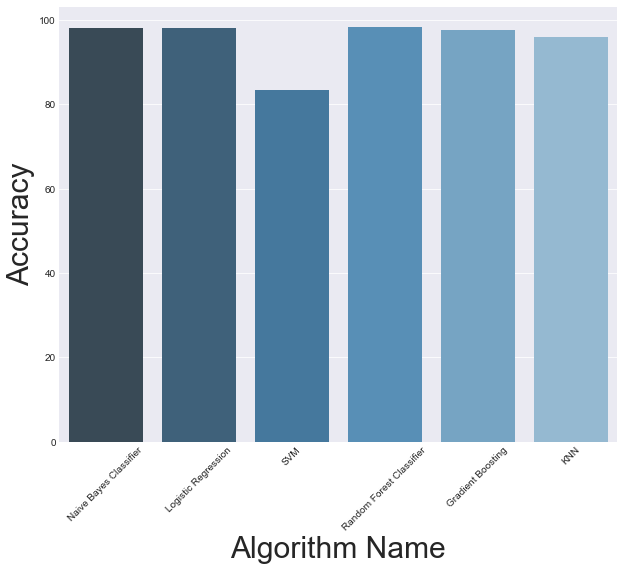

In [ ]:
algo_name=['Naive Bayes Classifier','Logistic Regression','SVM','Random Forest Classifier','Gradient Boosting','KNN']
acc=np.array(acc)
from numpy import median
plt.figure(figsize=(10,8))
sns.barplot(y=acc*100,x=algo_name,estimator=median,palette="Blues_d")
plt.xlabel('Algorithm Name',size=30)
plt.xticks(rotation=45)
plt.ylabel('Accuracy',size=30)

In [ ]:
import wordcloud
from PIL import Image 
from nltk.corpus import stopwords
data_ham  = df[df['Label'] == 0].copy()
data_spam = df[df['Label'] == 1].copy()

def show_wordcloud(data_spam_or_ham, title):
    mask = np.array(Image.open("cloud.png"))
    text = ' '.join(data_spam_or_ham['SMS'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',
                    mask = mask).generate(text)
    
    plt.figure(figsize=(15,15), frameon=True)
    fig_wordcloud.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))


Word Cloud Saved Successfully


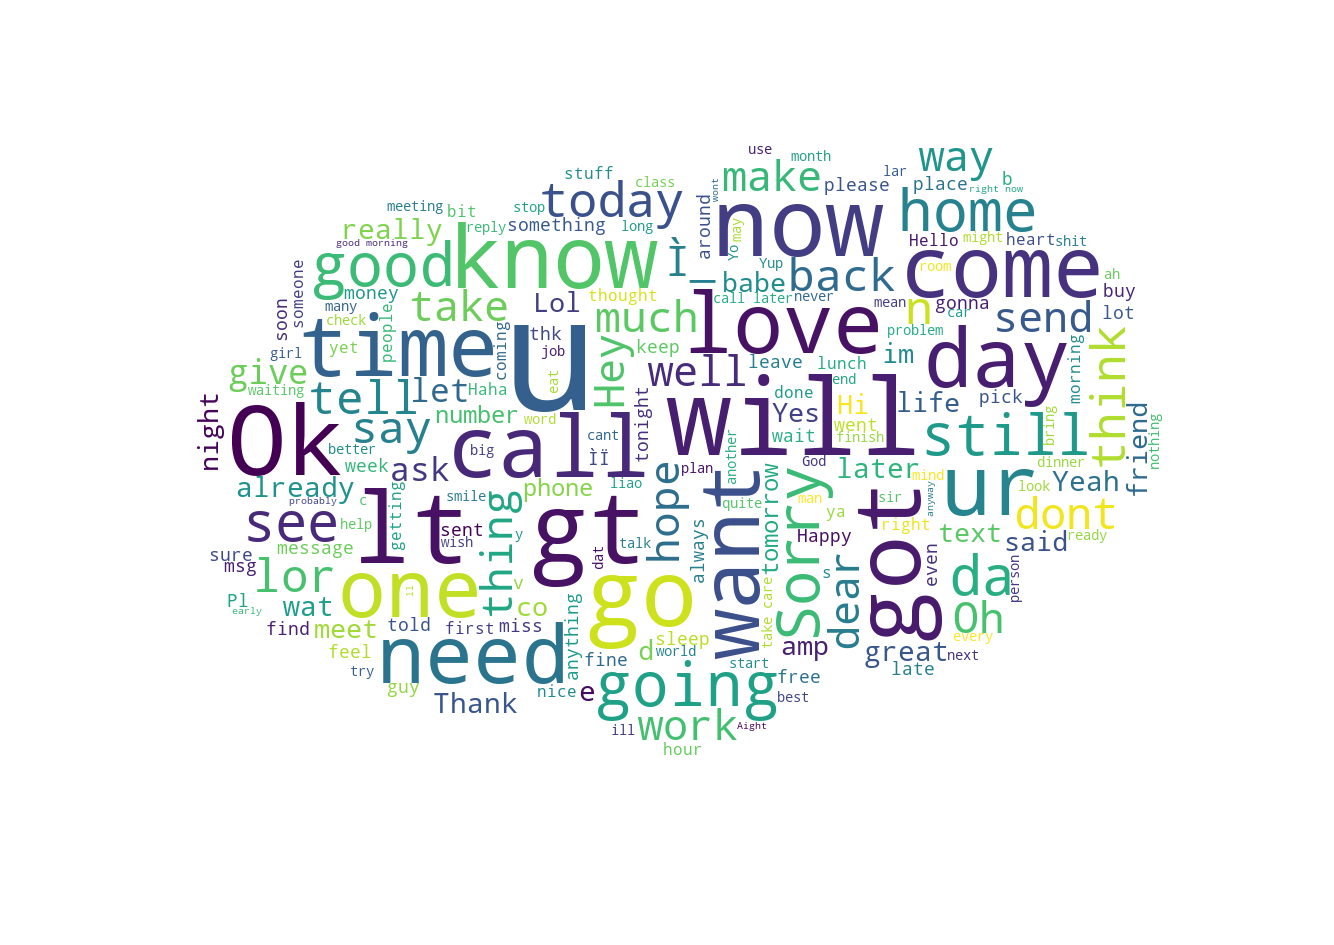

<Figure size 1080x1080 with 0 Axes>

In [ ]:
show_wordcloud(data_ham, "Ham messages")

Word Cloud Saved Successfully


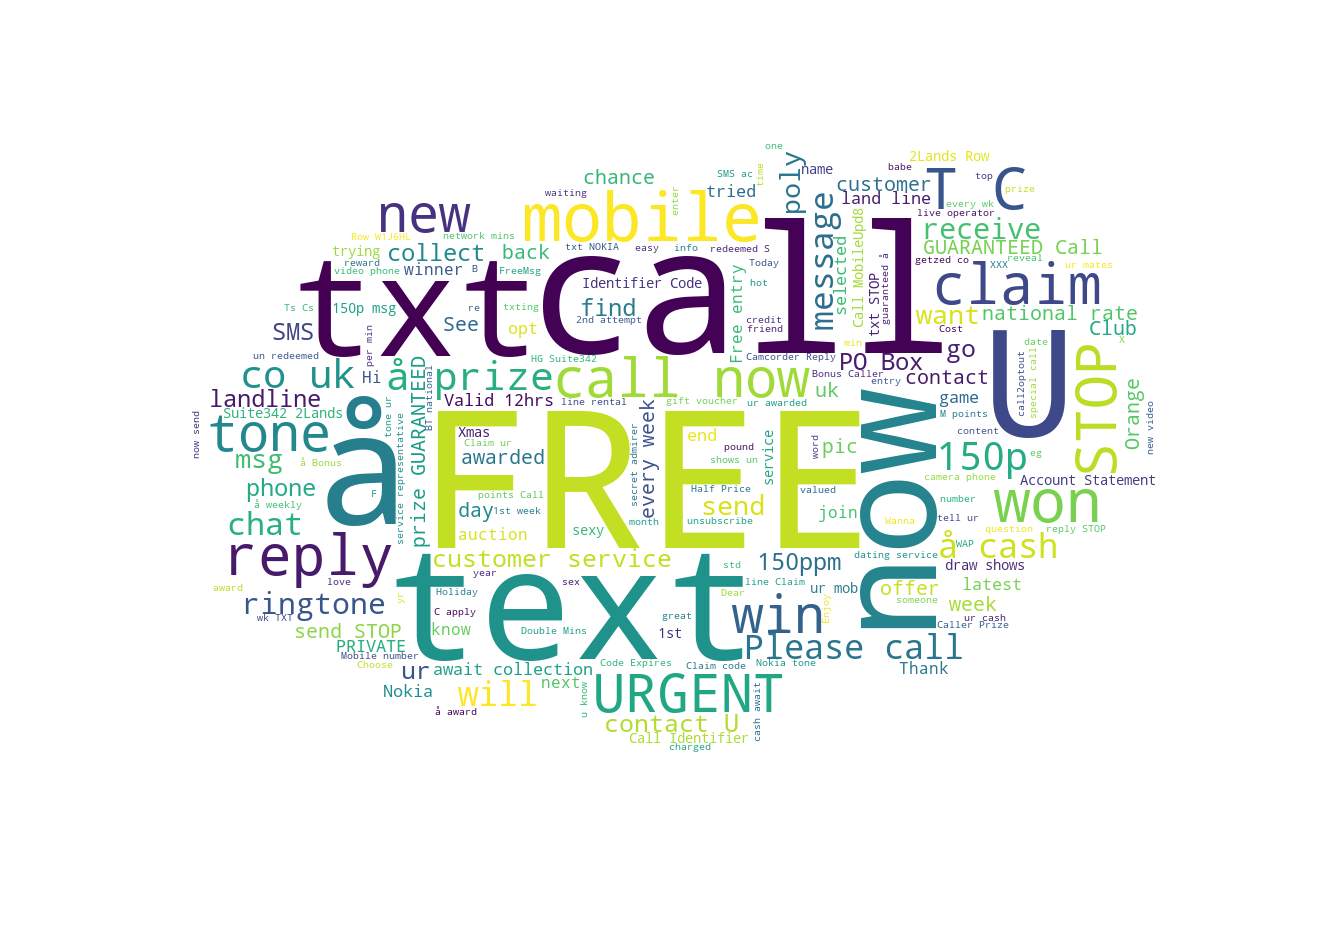

<Figure size 1080x1080 with 0 Axes>

In [ ]:
show_wordcloud(data_spam, "Spam messages")